# Serial Handling

In [86]:
import time
import os
import numpy as np
from sciopy.com_handling import available_serial_ports, connect_COM_port
from sciopy import StartStopMeasurement, SystemMessageCallback
import matplotlib.pyplot as plt

In [143]:
available_serial_ports()

['COM1', 'COM3']

In [142]:
ser.close()

In [140]:
ser = connect_COM_port("COM3", timeout=1)

Connection to COM3 is established.


In [5]:
def GetFirmwareIDs(serial):
    """Get firmware IDs"""
    serial.write(bytearray([0xD2, 0x00, 0xD2]))
    SystemMessageCallback(serial)

In [6]:
GetFirmwareIDs(ser)

Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0xd2', '0x1e', '0x1', '0x11', '0x0', '0x19', '0x0', '0xb', '0x40', '0x0', '0x9', '0x0', '0x25', '0x2', '0xc9', '0x0', '0xf', '0x1', '0x11', '0x0', '0x19', '0x0', '0xb', '0x40', '0x0', '0x9', '0x0', '0x25', '0x2', '0xc9', '0x0', '0xf', '0xd2', '0x18', '0x1', '0x83', '0x18']
message length:	 37


In [7]:
from sciopy.default_configurations import configuration_01

In [9]:
configuration_01(ser)  # tbd in ender gui
SystemMessageCallback(ser) # tbd: repeat or print one time the acknowlegement

Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', 

In [144]:
sum(cnts)

223

In [124]:
cnts = np.array([1,2,10,20,40,50,100])

for cnt in cnts:
    brst_cnt = bytearray([0xB0, 0x03, 0x02, 0x00, cnt, 0xB0])
    print("Burst count:",brst_cnt[4],"\n")
    # Write burst count
    ser.write(brst_cnt)
    SystemMessageCallback(ser)

    start_time = time.time()
    measurement_data_hex = StartStopMeasurement(ser)

    total_time = time.time() - start_time
    print("--- %s seconds ---" % (total_time))
    np.savez(f'wrkbnch_data/brstcnt_{cnt}.npz',
             measurement_data_hex = measurement_data_hex,
             total_time = total_time, 
             msg_len= len(measurement_data_hex),
            )
    print("-------------------------")

SystemMessageCallback(ser)

Burst count: 1 

Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18']
message length:	 4
Starting measurement.
Stopping measurement.
--- 2.7302327156066895 seconds ---
-------------------------
Burst count: 2 

Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18']
message length:	 4
Starting measurement.
Stopping measurement.
--- 3.1351563930511475 seconds ---
-------------------------
Burst count: 10 

Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18']
message length:	 4
Starting measurement.
Stopping measurement.
--- 7.1537299156188965 seconds ---
-------------------------
Burst count: 20 

Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18']
message length:	 4
Starting measurement.
Stopping measurement.
--- 12.178289413452148 seconds ---
------------------------

In [128]:
cnts

array([  1,   2,  10,  20,  40,  50, 100])

In [132]:
perf_dct = {'total_time':[], 'msg_len':[], 'burst_count':[]}
for cnt in cnts:
    print(cnt)
    try:
        tmp = np.load(f'wrkbnch_data/brstcnt_{cnt}.npz', allow_pickle=True)
        perf_dct['total_time'].append(tmp['total_time'].tolist())
        perf_dct['msg_len'].append(tmp['msg_len'].tolist())
        perf_dct['burst_count'].append(cnt)
    except:
        print(fls,"not readable")

1
2
10
20
40
50
100


In [145]:
perf_dct_gui = {'total_time':[], 'msg_len':[], 'burst_count':[]}
for cnt in cnts:
    print(cnt)
    try:
        tmp = np.load(f'wrkbnch_data/gui_brstcnt_{cnt}.npz', allow_pickle=True)
        perf_dct_gui['total_time'].append(tmp['total_time'].tolist())
        perf_dct_gui['msg_len'].append(tmp['msg_len'].tolist())
        perf_dct_gui['burst_count'].append(cnt)
    except:
        print(fls,"not readable")

1
2
10
20
40
50
100


In [133]:
perf_dct['total_time']

[2.7302327156066895,
 3.1351563930511475,
 7.1537299156188965,
 12.178289413452148,
 22.21899175643921,
 27.260925769805908,
 52.36659336090088]

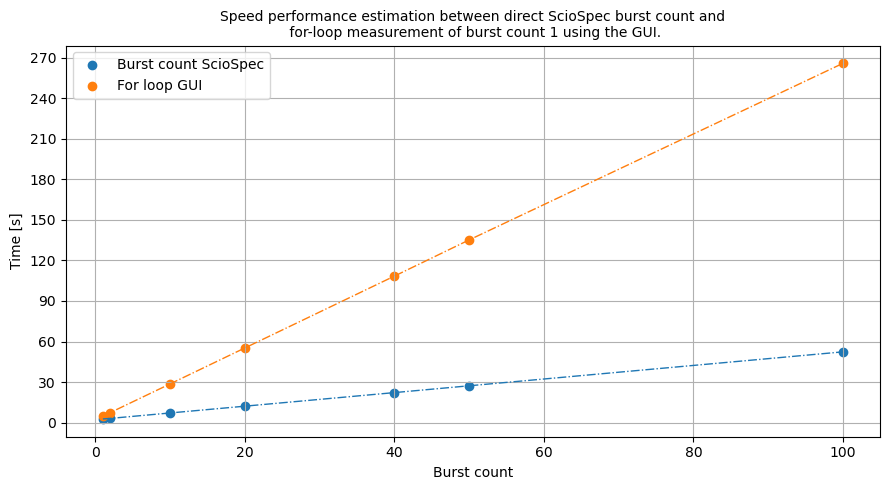

In [217]:
fnt = "DejaVu Sans"
plt.figure(figsize=(9,5))
plt.grid()
plt.title("Speed performance estimation between direct ScioSpec burst count and\n for-loop measurement of burst count 1 using the GUI.", font=fnt)
plt.scatter(perf_dct['burst_count'] ,perf_dct['total_time'], label="Burst count ScioSpec")
plt.plot(perf_dct['burst_count'] ,perf_dct['total_time'],'-.', linewidth=1)

plt.scatter(perf_dct_gui['burst_count'] ,perf_dct_gui['total_time'], label="For loop GUI")
plt.plot(perf_dct_gui['burst_count'] ,perf_dct_gui['total_time'],'-.', linewidth=1)
plt.xlabel("Burst count", font=fnt)
plt.ylabel("Time [s]", font=fnt)
plt.yticks(ticks=np.arange(0,300,30))
#plt.plot(perf_dct['burst_count'] ,1.2*perf_dct['total_time'],'-.', linewidth=1)
#plt.scatter(np.arange(0,100,10),np.arange(0,100,10)*2.7)
plt.legend()
plt.tight_layout()
#plt.savefig('../images/perf_est_ScioSpec_burst_for_/pic_01.png', dpi=300)
plt.show()

# Hexcallback

In [1]:
import struct
from dataclasses import dataclass
from typing import List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def del_hex_in_list(lst: list) -> list:
    return [
        "0" + ele.replace("0x", "") if len(ele) == 1 else ele.replace("0x", "")
        for ele in lst
    ]


def bytesarray_to_float(bytes_array: np.ndarray) -> float:
    bytes_array = [int(b, 16) for b in bytes_array]
    bytes_array = bytes(bytes_array)
    return struct.unpack("!f", bytes(bytes_array))[0]


def bytesarray_to_int(bytes_array: np.ndarray) -> int:
    bytes_array = bytesarray_to_byteslist(bytes_array)
    return int.from_bytes(bytes_array, "big")


def bytesarray_to_byteslist(bytes_array: np.ndarray) -> list:
    bytes_array = [int(b, 16) for b in bytes_array]
    return bytes(bytes_array)


def reshape_measurement_buffer(lst: list) -> np.ndarray:
    idx_b4 = [i for i, ele in enumerate(lst) if ele == "b4"]
    idx_b4 = np.array(idx_b4)
    step = abs(idx_b4[1] - idx_b4[0]) + 1
    return np.array(
        [lst[i : i + step] for i in range(idx_b4[0], idx_b4[-1] + step, step)],
        dtype=list,
    )[:-1]


@dataclass
class BaseSettingForEstimation:
    active_channel_groups: np.ndarray
    burst_count: int


@dataclass
class SingleFrame:
    start_tag: List[str]
    channel_group: str
    excitation_stgs: List[str]
    frequency_row: List[str]
    timestamp: int  # [ms]
    ch_1: complex
    ch_2: complex
    ch_3: complex
    ch_4: complex
    ch_5: complex
    ch_6: complex
    ch_7: complex
    ch_8: complex
    ch_9: complex
    ch_10: complex
    ch_11: complex
    ch_12: complex
    ch_13: complex
    ch_14: complex
    ch_15: complex
    ch_16: complex
    end_tag: str


def parse_single_frame(lst_ele: np.ndarray) -> SingleFrame:
    channels = {}
    enum = 0
    for i in range(11, 135, 8):
        enum += 1
        channels[f"ch_{enum}"] = complex(
            bytesarray_to_float(lst_ele[i : i + 4]),
            bytesarray_to_float(lst_ele[i + 4 : i + 8]),
        )

    excitation_stgs = np.array([ele for ele in lst_ele[3:5]])

    sgl_frm = SingleFrame(
        start_tag=lst_ele[0],
        channel_group=int(lst_ele[2]),
        excitation_stgs=excitation_stgs,
        frequency_row=lst_ele[5:7],
        timestamp=bytesarray_to_int(lst_ele[7:11]),
        **channels,
        end_tag=lst_ele[139],
    )
    return sgl_frm

In [3]:
# base_stgs_for_est = BaseSettingForEstimation(np.array([1]), 1)
# base_stgs_for_est
from sciopy.sciopy_dataclasses import ScioSpecMeasurementConfig

In [4]:
measurement_data = np.load("tmp_data/sample_000000.npz", allow_pickle=True)
measurement_data.files

['config', 'data', 'enderstat', 'circledrivepattern', 'kartesiandrivepattern']

In [11]:
#measurement_data['data'][0]

In [13]:
parse_single_frame(measurement_data['data'][0])

SingleFrame(start_tag='b4', channel_group=1, excitation_stgs=array(['1', '2'], dtype='<U1'), frequency_row=['0', '0'], timestamp=0, ch_1=(1.2251087427139282-0.3391319215297699j), ch_2=(-1.224099040031433+0.3421427309513092j), ch_3=(-0.06761793792247772-0.06170428544282913j), ch_4=(-0.008094284683465958-0.009728801436722279j), ch_5=(0.000978139229118824-4.024095323984511e-05j), ch_6=(3.0159530069795437e-05-0.00040526792872697115j), ch_7=(0.00041833764407783747+4.4160933612147346e-05j), ch_8=(-0.00011541175626916811-0.0005447313887998462j), ch_9=(-0.0007664732984267175-0.0011936132796108723j), ch_10=(0.0006124393548816442+0.0002588862262200564j), ch_11=(-0.000496247666887939-0.00100342882797122j), ch_12=(0.0005513371434062719+3.0604478524765e-05j), ch_13=(-0.0010232159402221441-0.0014807317638769746j), ch_14=(-0.00011219223233638331-0.0005662826588377357j), ch_15=(0.0008729307446628809+0.0005239679594524205j), ch_16=(0.001715516671538353+0.0013162072282284498j), end_tag='b4')

In [28]:
def parse_to_full_frame(measurement_data:np.ndarray)->np.ndarray:
    """Parses any measured byte representation into the dataclass SingleFrame"""
    data_frame = []
    for i, sf in enumerate(measurement_data):
        data_frame.append(parse_single_frame(sf))
    return np.array(data_frame)

In [29]:
parse_to_full_frame?

Signature: parse_to_full_frame(measurement_data: numpy.ndarray) -> numpy.ndarray
Docstring: <no docstring>
File:      c:\users\sciospeceit\appdata\local\temp\ipykernel_3516\1481531900.py
Type:      function


In [33]:
type(parse_to_full_frame(measurement_data['data'])[0])

__main__.SingleFrame

In [7]:
def get_channel_group_img(reshaped_measurement_buffer: np.ndarray, channel_group: int):
    img = np.empty((0, 16))
    for i, sf in enumerate(reshaped_measurement_buffer):
        tmp_f = parse_single_frame(sf)
        if tmp_f.channel_group == channel_group:
            tmp_f = tmp_f.__dict__
            tmp_row = np.array([tmp_f[f"ch_{ch_n}"] for ch_n in range(1, 17)])
            img = np.vstack((img, abs(tmp_row)))
    img = np.delete(np.matrix(img), 0, axis=0)
    print("Shape:", img.shape)
    return img

In [8]:
plt.imshow(get_channel_group_img(measurement_data, 1))

error: unpack requires a buffer of 4 bytes

# Save data to pickle

In [25]:
import pickle
from typing import Union
import os


from ender_sciospec_classes import CircleDrivePattern, KartesianDrivePattern
from sciopy.sciopy_dataclasses import ScioSpecMeasurementConfig


def split_pickle_to_classes(
    pkl_data: list,
) -> Union[ScioSpecMeasurementConfig, CircleDrivePattern, KartesianDrivePattern]:

    return pkl_data[0], pkl_data[1], pkl_data[2]

In [ ]:
#os.remove('meas_cnf.pkl')

In [ ]:
with open("meas_cnf.pkl", "rb") as f:
    meas_cnf = pickle.load(f)

In [ ]:
scio_spec_measurement_config,circledrivepattern,kartesiandrivepattern = split_pickle_to_classes(meas_cnf)

In [ ]:
scio_spec_measurement_config

ScioSpecMeasurementConfig(com_port='COM3', sample_per_step=10, actual_sample=0, s_path='tmp_data/', object='circle')

In [ ]:
circledrivepattern

CircleDrivePattern(active=True, wait_at_pos=1, radius=100, phi_steps=45, abs_x_posis=array([280.        , 250.71067812, 180.        , 109.28932188,
        80.        , 109.28932188, 180.        , 250.71067812]), abs_y_posis=array([180.        , 250.71067812, 280.        , 250.71067812,
       180.        , 109.28932188,  80.        , 109.28932188]), abs_z_posis=0, motion_speed=1500, n_points=0, actual_point=0)

In [ ]:
kartesiandrivepattern

KartesianDrivePattern(active=False, wait_at_pos=1, motion_speed=1500, x_start=160, y_start=160, x_stop=180, y_stop=180, x_stp_num=10, y_stp_num=10, abs_x_posis=array([0.]), abs_y_posis=array([0.]), abs_z_posis=array([0.]), n_points=0, actual_point=0)

In [ ]:
import time

# Control saved data

In [2]:
import numpy as np
measurement_data = np.load("tmp_data/sample_000000.npz", allow_pickle=True)
measurement_data.files

['config', 'data', 'enderstat', 'circledrivepattern', 'kartesiandrivepattern']